Please **submit this Jupyter notebook through Canvas** no later than **Monday November 19, 12:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

**Jordan Earle** (12297127)

**Natasja Wezel** (11027649)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

-----
# Exercise 1

# (a)
We have the table of data in the next cell.

Using `numpy.linalg.lstsq()`, fit a straight line, a quadratic function, and a cubic function to these data. Plot the data and your fitted functions in a graph.

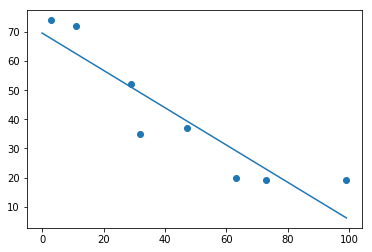

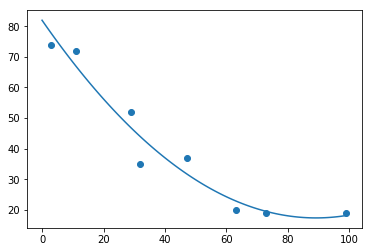

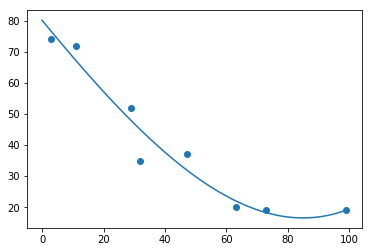

In [8]:
t = np.array([3, 11, 29, 32, 47, 63, 73, 99], dtype=np.float)
w = np.array([74, 72, 52, 35, 37, 20, 19, 19], dtype=np.float)

# make a line y = ax + b
A = np.vstack([t, np.ones(len(t))]).transpose()

m, b = np.linalg.lstsq(A, w, rcond=None)[0]

linemxb = []
squaremxb = []
cubemxb = []

for x in range(0, 100):
    linemxb.append((m*x) + b)
    
plt.figure(0)
plt.scatter(t,w)
plt.plot(range(0,100), linemxb)

# make a quadratic function y = ax^2 + bx + c
tsquare = t**2

Asquared = np.vstack([tsquare, A.transpose()]).transpose()

a, b , c = np.linalg.lstsq(Asquared, w, rcond=None)[0]

for x in range(0, 100):
    squaremxb.append(a*(x**2) + b*x + c)

plt.figure(1)
plt.scatter(t,w)
plt.plot(range(0,100), squaremxb)

# make a cubed function y = ax^3 + bx^2 + cx + d
tcubed = t**3

Acubed = np.vstack([tcubed, Asquared.transpose()]).transpose()

a,b,c,d = np.linalg.lstsq(Acubed, w, rcond=None)[0]

for x in range(0, 100):
    cubemxb.append(a*(x**3) + b*(x**2) + c * x + d)

plt.figure(2)
plt.scatter(t,w)
plt.plot(range(0,100), cubemxb)


## (b)
Compute the condition number of the associated Vandermonde matrix in each case.

In [15]:
Vm1 = np.vstack([np.ones(len(t)),t]).transpose()
Vm2 = np.vstack([np.ones(len(t)),t,tsquare]).transpose()
Vm3 = np.vstack([np.ones(len(t)),t,tsquare,tcubed]).transpose()

# so cond(x, p = None) uses 2 norm
condition_Vm1 = np.linalg.cond(Vm1)
print(condition_Vm1)

condition_Vm2 = np.linalg.cond(Vm2)
print(condition_Vm2)

condition_Vm3 = np.linalg.cond(Vm3)
print(condition_Vm3)

95.97978844376205
10562.214789189244
1192946.8771620495


----
# Exercise 2
Planets follow an elliptical orbit, which can be represented in a Cartesian $(x,y)$-coordinate system by the equation
$$ ay^2 + bxy + cx + dy + e = x^2. $$

## (a)
Use `numpy.linalg.lstsq()` to determine the orbital parameters $a,b,c,d,e$ for the table of observations given below.
In addition, plot the resulting orbit and the data points in the $(x,y)$-plane.

[[0.1521 0.3978 1.02   0.39   1.    ]
 [0.1024 0.304  0.95   0.32   1.    ]
 [0.0729 0.2349 0.87   0.27   1.    ]
 [0.0484 0.1694 0.77   0.22   1.    ]
 [0.0324 0.1206 0.67   0.18   1.    ]
 [0.0225 0.084  0.56   0.15   1.    ]
 [0.0169 0.0572 0.44   0.13   1.    ]
 [0.0144 0.036  0.3    0.12   1.    ]
 [0.0169 0.0208 0.16   0.13   1.    ]
 [0.0225 0.0015 0.01   0.15   1.    ]]
-2.635625483712111 0.14364618259889395 0.5514469631403582 3.222940338105902 -0.4328942702644514


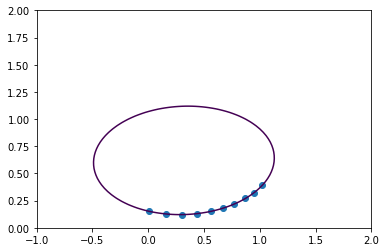

In [19]:
x = np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01], dtype=np.float)
y = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15], dtype=np.float)

# in A theres 5 columns for yy, xy, x, y, 1
A = np.stack([y*y, x*y, x, y, np.ones(len(x))]).transpose()
print(A)

# these are the coefficients for the function , found by the least squares method
a,b,c,d,e = np.linalg.lstsq(A, x*x, rcond=-1)[0]

print(a,b,c,d,e)

# how to make a proper linspace for this function?
linspace_x = np.linspace(-1, 2, 100)
linspace_y = np.linspace(-1, 2, 100)

X, Y = np.meshgrid(linspace_x,linspace_y)

# i'm not sure if this is right I saw it on stackoverflow somewhere
F = a * Y**2 + b * X * Y + c * X + d * Y + e - X**2 

# plot it
plt.contour(X,Y,F,[0.0])
plt.scatter(x,y)
plt.xlim(-1,2)
plt.ylim(0,2)
plt.show()


## (b)
This least squares problem is nearly rank-deficient. To see what effect this has on the solution, perturb the input data slightly by adding random noise between -0.005 and 0.005 (using, for instance, `numpy.random.rand`), and solve the least squares problem with the perturbed data. Compare the new values for the parameters with those from (a). What effect does this difference have on the plot of the orbit?

[[1.48867527e-01 3.91845944e-01 1.01558288e+00 3.85833548e-01
  1.00000000e+00]
 [9.97508301e-02 2.98646795e-01 9.45582876e-01 3.15833548e-01
  1.00000000e+00]
 [7.06674753e-02 2.30100967e-01 8.65582876e-01 2.65833548e-01
  1.00000000e+00]
 [4.65841205e-02 1.65238468e-01 7.65582876e-01 2.15833548e-01
  1.00000000e+00]
 [3.09174366e-02 1.17031799e-01 6.65582876e-01 1.75833548e-01
  1.00000000e+00]
 [2.12674237e-02 8.10226220e-02 5.55582876e-01 1.45833548e-01
  1.00000000e+00]
 [1.58340818e-02 5.48109387e-02 4.35582876e-01 1.25833548e-01
  1.00000000e+00]
 [1.34174109e-02 3.42384132e-02 2.95582876e-01 1.15833548e-01
  1.00000000e+00]
 [1.58340818e-02 1.95775453e-02 1.55582876e-01 1.25833548e-01
  1.00000000e+00]
 [2.12674237e-02 8.14170550e-04 5.58287555e-03 1.45833548e-01
  1.00000000e+00]]
-2.635625483712062 0.1436461825988855 0.543211209158768 3.2016124274728948 -0.41709285448452704


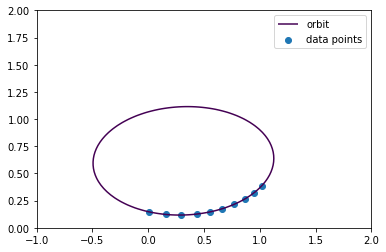

differences
a: -4.884981308350689e-14 
b: 8.43769498715119e-15 
c: 0.008235753981590266 
d: 0.021327910633007097 
e: -0.015801415779924333


In [37]:
x2 = x + np.random.rand() * 0.01 - 0.005
y2 = y + np.random.rand() * 0.01 - 0.005

A2 = np.stack([y2*y2, x2*y2, x2, y2, np.ones(len(x2))]).transpose()
print(A2)

# these are the coefficients for the function , found by the least squares method
a2,b2,c2,d2,e2 = np.linalg.lstsq(A2, x2*x2, rcond=-1)[0]

print(a2,b2,c2,d2,e2)

# how to make a proper linspace for this function?
linspace_x2 = np.linspace(-1, 2, 100)
linspace_y2 = np.linspace(-1, 2, 100)

X2, Y2 = np.meshgrid(linspace_x2,linspace_y2)

# i'm not sure if this is right I saw it on stackoverflow somewhere
F2 = a2 * Y2**2 + b2 * X2 * Y2 + c2 * X2 + d2 * Y2 + e2 - X2**2 

# plot it
CS = plt.contour(X2,Y2,F2,[0.0])

labels = ['orbit']

for i in range(len(labels)):
    CS.collections[i].set_label(labels[i])

plt.scatter(x2,y2, label="data points")
plt.xlim(-1,2)
plt.ylim(0,2)
plt.legend()
plt.show()

differences = [a-a2, b-b2, c-c2, d-d2, e-e2]
print("differences\na:", differences[0],"\nb:", differences[1],"\nc:",differences[2],"\nd:",differences[3],"\ne:",differences[4])

## (c)
Can you explain this behaviour?

## (d)
Solve the same least squares problem again, for both the original *and* the perturbed data, this time using a routine specifically designed to deal with rank deficiencies. An example is `numpy.linalg.lstsq`, with the argument `rcond` as tolerance. Experiment with various tolerances, say $10^-k$ for $k \in \{1, ..., 5\}$. Compare the behaviour of the two solutions (one for the original input data, one for the perturbed data). How well do the resulting orbits fit the data points as the tolerance varies?